## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

cost = pd.read_csv('C:/Users/eun01/Downloads/사교육비조사.csv', encoding='cp949')
df = pd.DataFrame(cost)
df.head(n=10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


In [89]:
from matplotlib import rc
import platform

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

1.2 불러온 데이터의 요약 정보를 출력하세요.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [3]:
df.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [4]:
df1 = df[df['학교급구분코드'] == 3]
len(df1)

30052

In [5]:
df2 = df1.drop(columns='학교급구분코드')
df2.head()

,지역구분코드,행정구역시도코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,1,0.333333,0.0,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,11,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,11,1,0.333333,0.0,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN


2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [6]:
df3 = df2.drop(['지역구분코드', '행정구역시도코드'], axis=1)
df3.head()

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,0.333333,0.0,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,0.333333,0.0,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [7]:
df3['방과후학교참여여부'].unique()

array([1, 2], dtype=int64)

In [8]:
ohe = OneHotEncoder(sparse=False)
df3['방과후학교참여여부'].values
df3['방과후학교참여여부'].values.reshape(-1,1)
ohe.fit(df3['방과후학교참여여부'].values.reshape(-1,1))
ohe.transform(df3['방과후학교참여여부'].values.reshape(-1,1))

C:\Users\eun01\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [9]:
ohe.categories_
label_ohe = ohe.transform(df3['방과후학교참여여부'].values.reshape(-1,1))
ohe_df = pd.DataFrame(label_ohe, columns=['참여', '미참여'])
ohe_df
df4 = pd.concat([df3, ohe_df], axis=1)
df4.head()

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여
4920,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,1.0,2.0,71.0,61.0,2.0,4.0,NaN,1.0,0.0
4921,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,2.0,3.0,51.0,51.0,3.0,6.0,NaN,1.0,0.0
4922,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,2.0,5.0,31.0,41.0,3.0,4.0,NaN,1.0,0.0
4923,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,2.0,5.0,51.0,51.0,3.0,1.0,NaN,1.0,0.0
4924,1.0,0.333333,0.0,12.0,12.0,0.0,2203.395453,2.0,4.0,71.0,62.0,1.0,8.0,NaN,1.0,0.0


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [11]:
df5 = df4.drop(columns='EBS교재비')

In [12]:
df5.head()

,방과후학교참여여부,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여
4920,1.0,0.333333,0.0,0.0,0.0,0.000000,1.0,2.0,71.0,61.0,2.0,4.0,NaN,1.0,0.0
4921,1.0,0.333333,0.0,0.0,0.0,0.000000,2.0,3.0,51.0,51.0,3.0,6.0,NaN,1.0,0.0
4922,1.0,0.333333,0.0,0.0,0.0,0.000000,2.0,5.0,31.0,41.0,3.0,4.0,NaN,1.0,0.0
4923,1.0,0.333333,0.0,0.0,0.0,0.000000,2.0,5.0,51.0,51.0,3.0,1.0,NaN,1.0,0.0
4924,1.0,0.333333,12.0,12.0,0.0,2203.395453,2.0,4.0,71.0,62.0,1.0,8.0,NaN,1.0,0.0


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

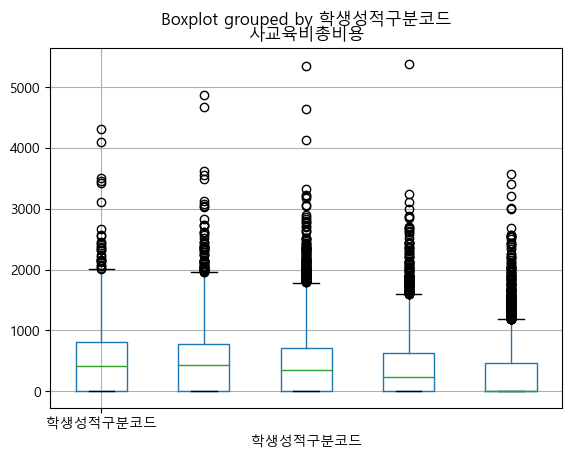

In [87]:
box = df5.boxplot(column='사교육비총비용', by='학생성적구분코드')
plt.xticks([1], ['학생성적구분코드'])
plt.show()

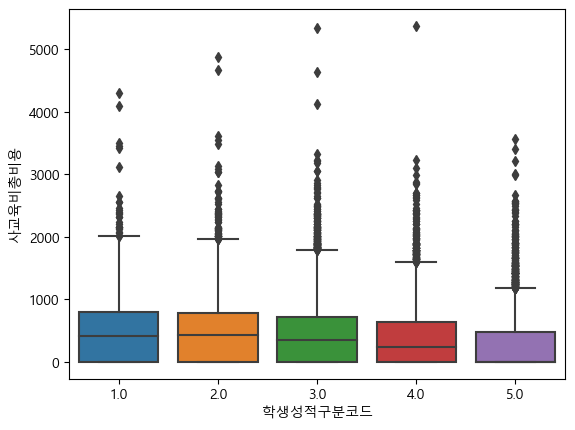

In [90]:
sns.boxplot(x="학생성적구분코드",y="사교육비총비용",data=df5)
plt.show()

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [14]:
def as_group(value):
    if value in [1,2]:
        return '상위'
    elif value in [4,5]:
        return '하위'
    else:
        return '외'
    
    
df5['dummy'] = df5['학생성적구분코드'].apply(as_group)
df6 = df5[df5['dummy'].isin(['상위', '하위'])]
df6.head()

,방과후학교참여여부,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,dummy
4920,1.0,0.333333,0.000000,0.000000,0.0,0.000000,1.0,2.0,71.0,61.0,2.0,4.0,NaN,1.0,0.0,상위
4922,1.0,0.333333,0.000000,0.000000,0.0,0.000000,2.0,5.0,31.0,41.0,3.0,4.0,NaN,1.0,0.0,하위
4923,1.0,0.333333,0.000000,0.000000,0.0,0.000000,2.0,5.0,51.0,51.0,3.0,1.0,NaN,1.0,0.0,하위
4924,1.0,0.333333,12.000000,12.000000,0.0,2203.395453,2.0,4.0,71.0,62.0,1.0,8.0,NaN,1.0,0.0,하위
4925,1.0,0.333333,13.333333,13.333333,0.0,2518.166232,2.0,4.0,51.0,51.0,3.0,5.0,NaN,1.0,0.0,하위


In [15]:
df6['dummy'].unique

<bound method Series.unique of 4920     상위
4922     하위
4923     하위
4924     하위
4925     하위
         ..
75678    하위
75679    하위
75680    하위
75681    상위
75682    상위
Name: dummy, Length: 21020, dtype: object>

In [16]:
df6['dummy'].values
df6['dummy'].values.reshape(-1,1)
ohe.fit(df6['dummy'].values.reshape(-1,1))
ohe.transform(df6['dummy'].values.reshape(-1,1))

C:\Users\eun01\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [17]:
ohe.categories_
label_ohe1 = ohe.transform(df6['dummy'].values.reshape(-1,1))
ohe_df1 = pd.DataFrame(label_ohe1, columns=['상위', '하위'])
ohe_df1
df7 = pd.concat([df5, ohe_df1], axis=1)
df7.head()

,방과후학교참여여부,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,dummy,상위,하위
4920,1.0,0.333333,0.0,0.0,0.0,0.000000,1.0,2.0,71.0,61.0,2.0,4.0,NaN,1.0,0.0,상위,0.0,1.0
4921,1.0,0.333333,0.0,0.0,0.0,0.000000,2.0,3.0,51.0,51.0,3.0,6.0,NaN,1.0,0.0,외,1.0,0.0
4922,1.0,0.333333,0.0,0.0,0.0,0.000000,2.0,5.0,31.0,41.0,3.0,4.0,NaN,1.0,0.0,하위,1.0,0.0
4923,1.0,0.333333,0.0,0.0,0.0,0.000000,2.0,5.0,51.0,51.0,3.0,1.0,NaN,1.0,0.0,하위,0.0,1.0
4924,1.0,0.333333,12.0,12.0,0.0,2203.395453,2.0,4.0,71.0,62.0,1.0,8.0,NaN,1.0,0.0,하위,0.0,1.0


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A: 전자는 Numerical Variable을 후자는 Categorical Variable을 주로 다룬다.

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [18]:
df8 = df7.drop(columns=['하위'])
df8.head()

,방과후학교참여여부,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,dummy,상위
4920,1.0,0.333333,0.0,0.0,0.0,0.000000,1.0,2.0,71.0,61.0,2.0,4.0,NaN,1.0,0.0,상위,0.0
4921,1.0,0.333333,0.0,0.0,0.0,0.000000,2.0,3.0,51.0,51.0,3.0,6.0,NaN,1.0,0.0,외,1.0
4922,1.0,0.333333,0.0,0.0,0.0,0.000000,2.0,5.0,31.0,41.0,3.0,4.0,NaN,1.0,0.0,하위,1.0
4923,1.0,0.333333,0.0,0.0,0.0,0.000000,2.0,5.0,51.0,51.0,3.0,1.0,NaN,1.0,0.0,하위,0.0
4924,1.0,0.333333,12.0,12.0,0.0,2203.395453,2.0,4.0,71.0,62.0,1.0,8.0,NaN,1.0,0.0,하위,0.0


2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

A:독립변수들 간의 상관관계가 있는 것을 말한다. DUmmy 변수 중 한 변수를 drop하면 다중공선성 문제가 완화된다.

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

In [101]:
df9 = df8[['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수']]
df9.head()
df9.corr()

,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수
사교육참여시간수,1.000000,0.788419,0.514551
일반교과사교육시간수,0.788419,1.000000,-0.103757
예체능사교육시간수,0.514551,-0.103757,1.000000


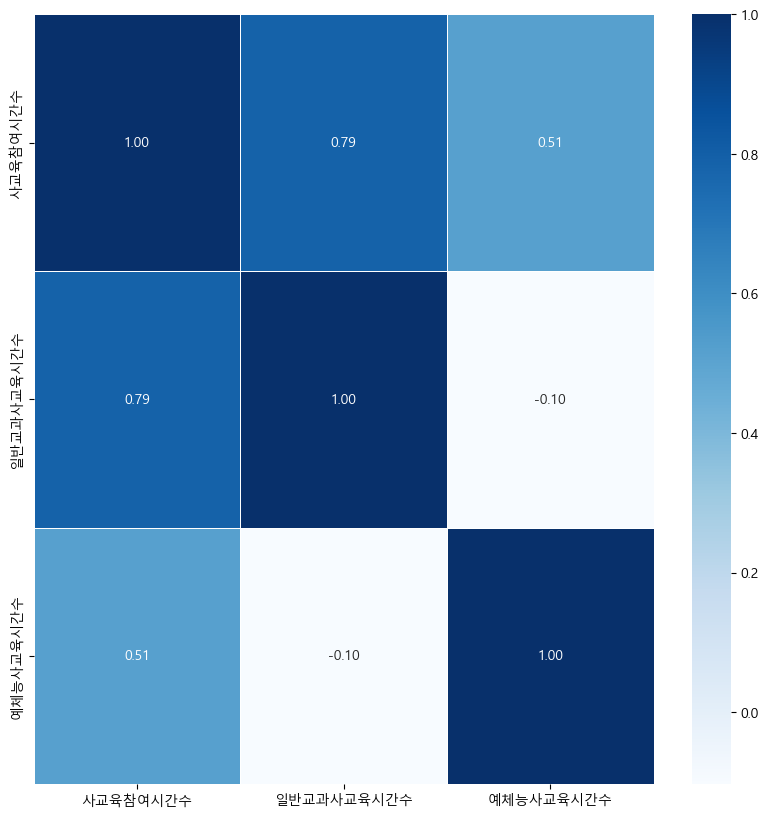

In [102]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df9.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [112]:
df8['사교육비총비용'].dropna()

4920       0.000
4921       0.000
4922       0.000
4923       0.000
4924     419.753
          ...   
75678      0.000
75679      0.000
75680    105.000
75681    112.500
75682      0.000
Name: 사교육비총비용, Length: 30052, dtype: float64

C:\Users\eun01\AppData\Local\Temp\ipykernel_12536\2967124129.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df8.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Reds')


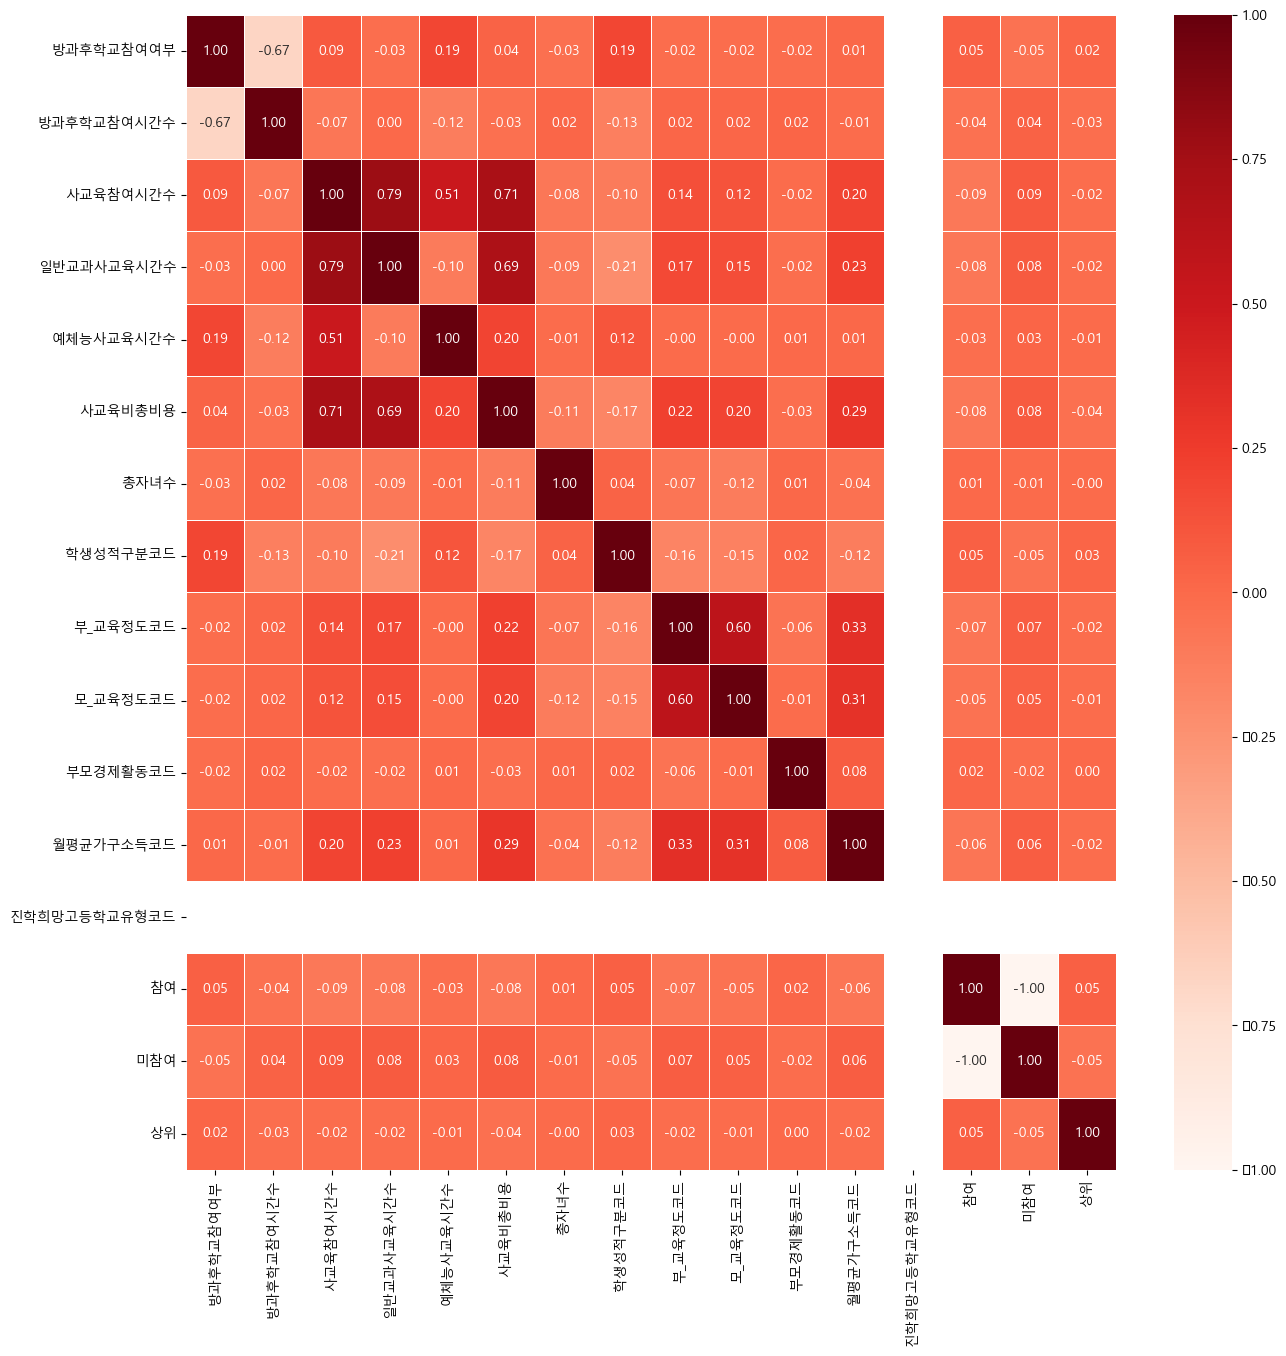

In [98]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df8.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Reds')
plt.show()

<Figure size 2500x2500 with 0 Axes>

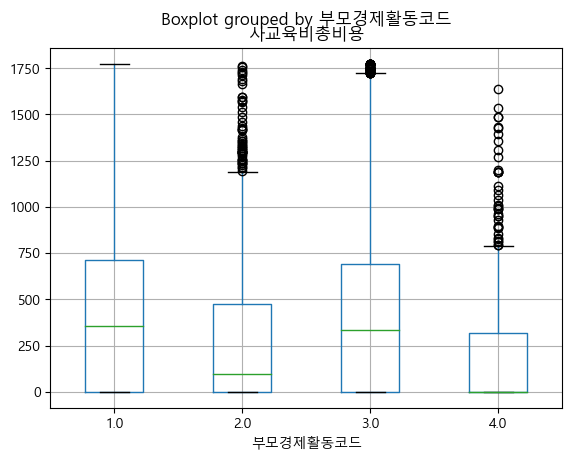

In [107]:
plt.figure(figsize=(25,25))
box = df8.boxplot(column='사교육비총비용', by='부모경제활동코드')
plt.show()

<Figure size 1500x1500 with 0 Axes>

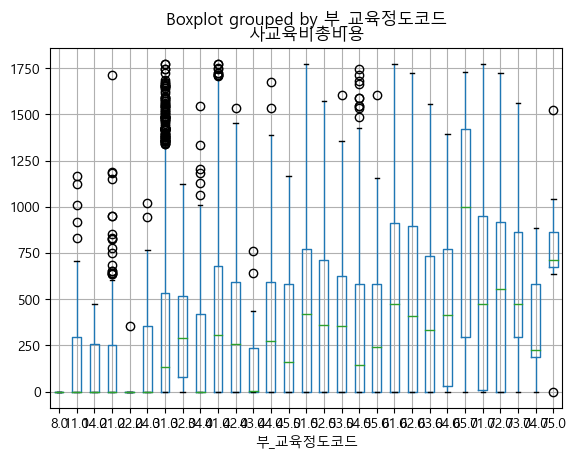

In [162]:
plt.figure(figsize=(15,15))
box0 = df8.boxplot(column='사교육비총비용', by='부_교육정도코드')
plt.show()

<Figure size 1500x1500 with 0 Axes>

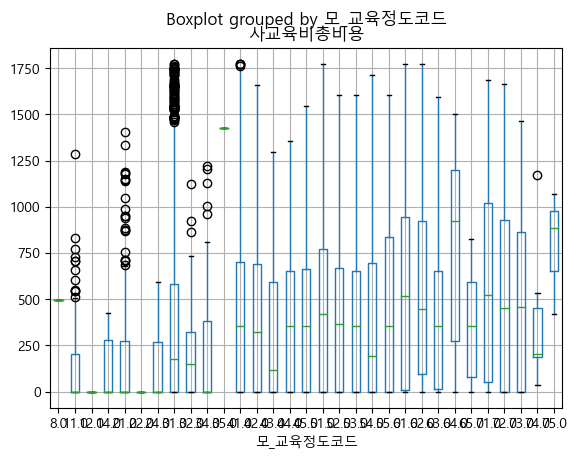

In [161]:
plt.figure(figsize=(15,15))
box1 = df8.boxplot(column='사교육비총비용', by='모_교육정도코드')
plt.show()

### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

In [118]:
df8_corr = df8.corr()

C:\Users\eun01\AppData\Local\Temp\ipykernel_12536\3490028467.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df8_corr = df8.corr()


C:\Users\eun01\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\eun01\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


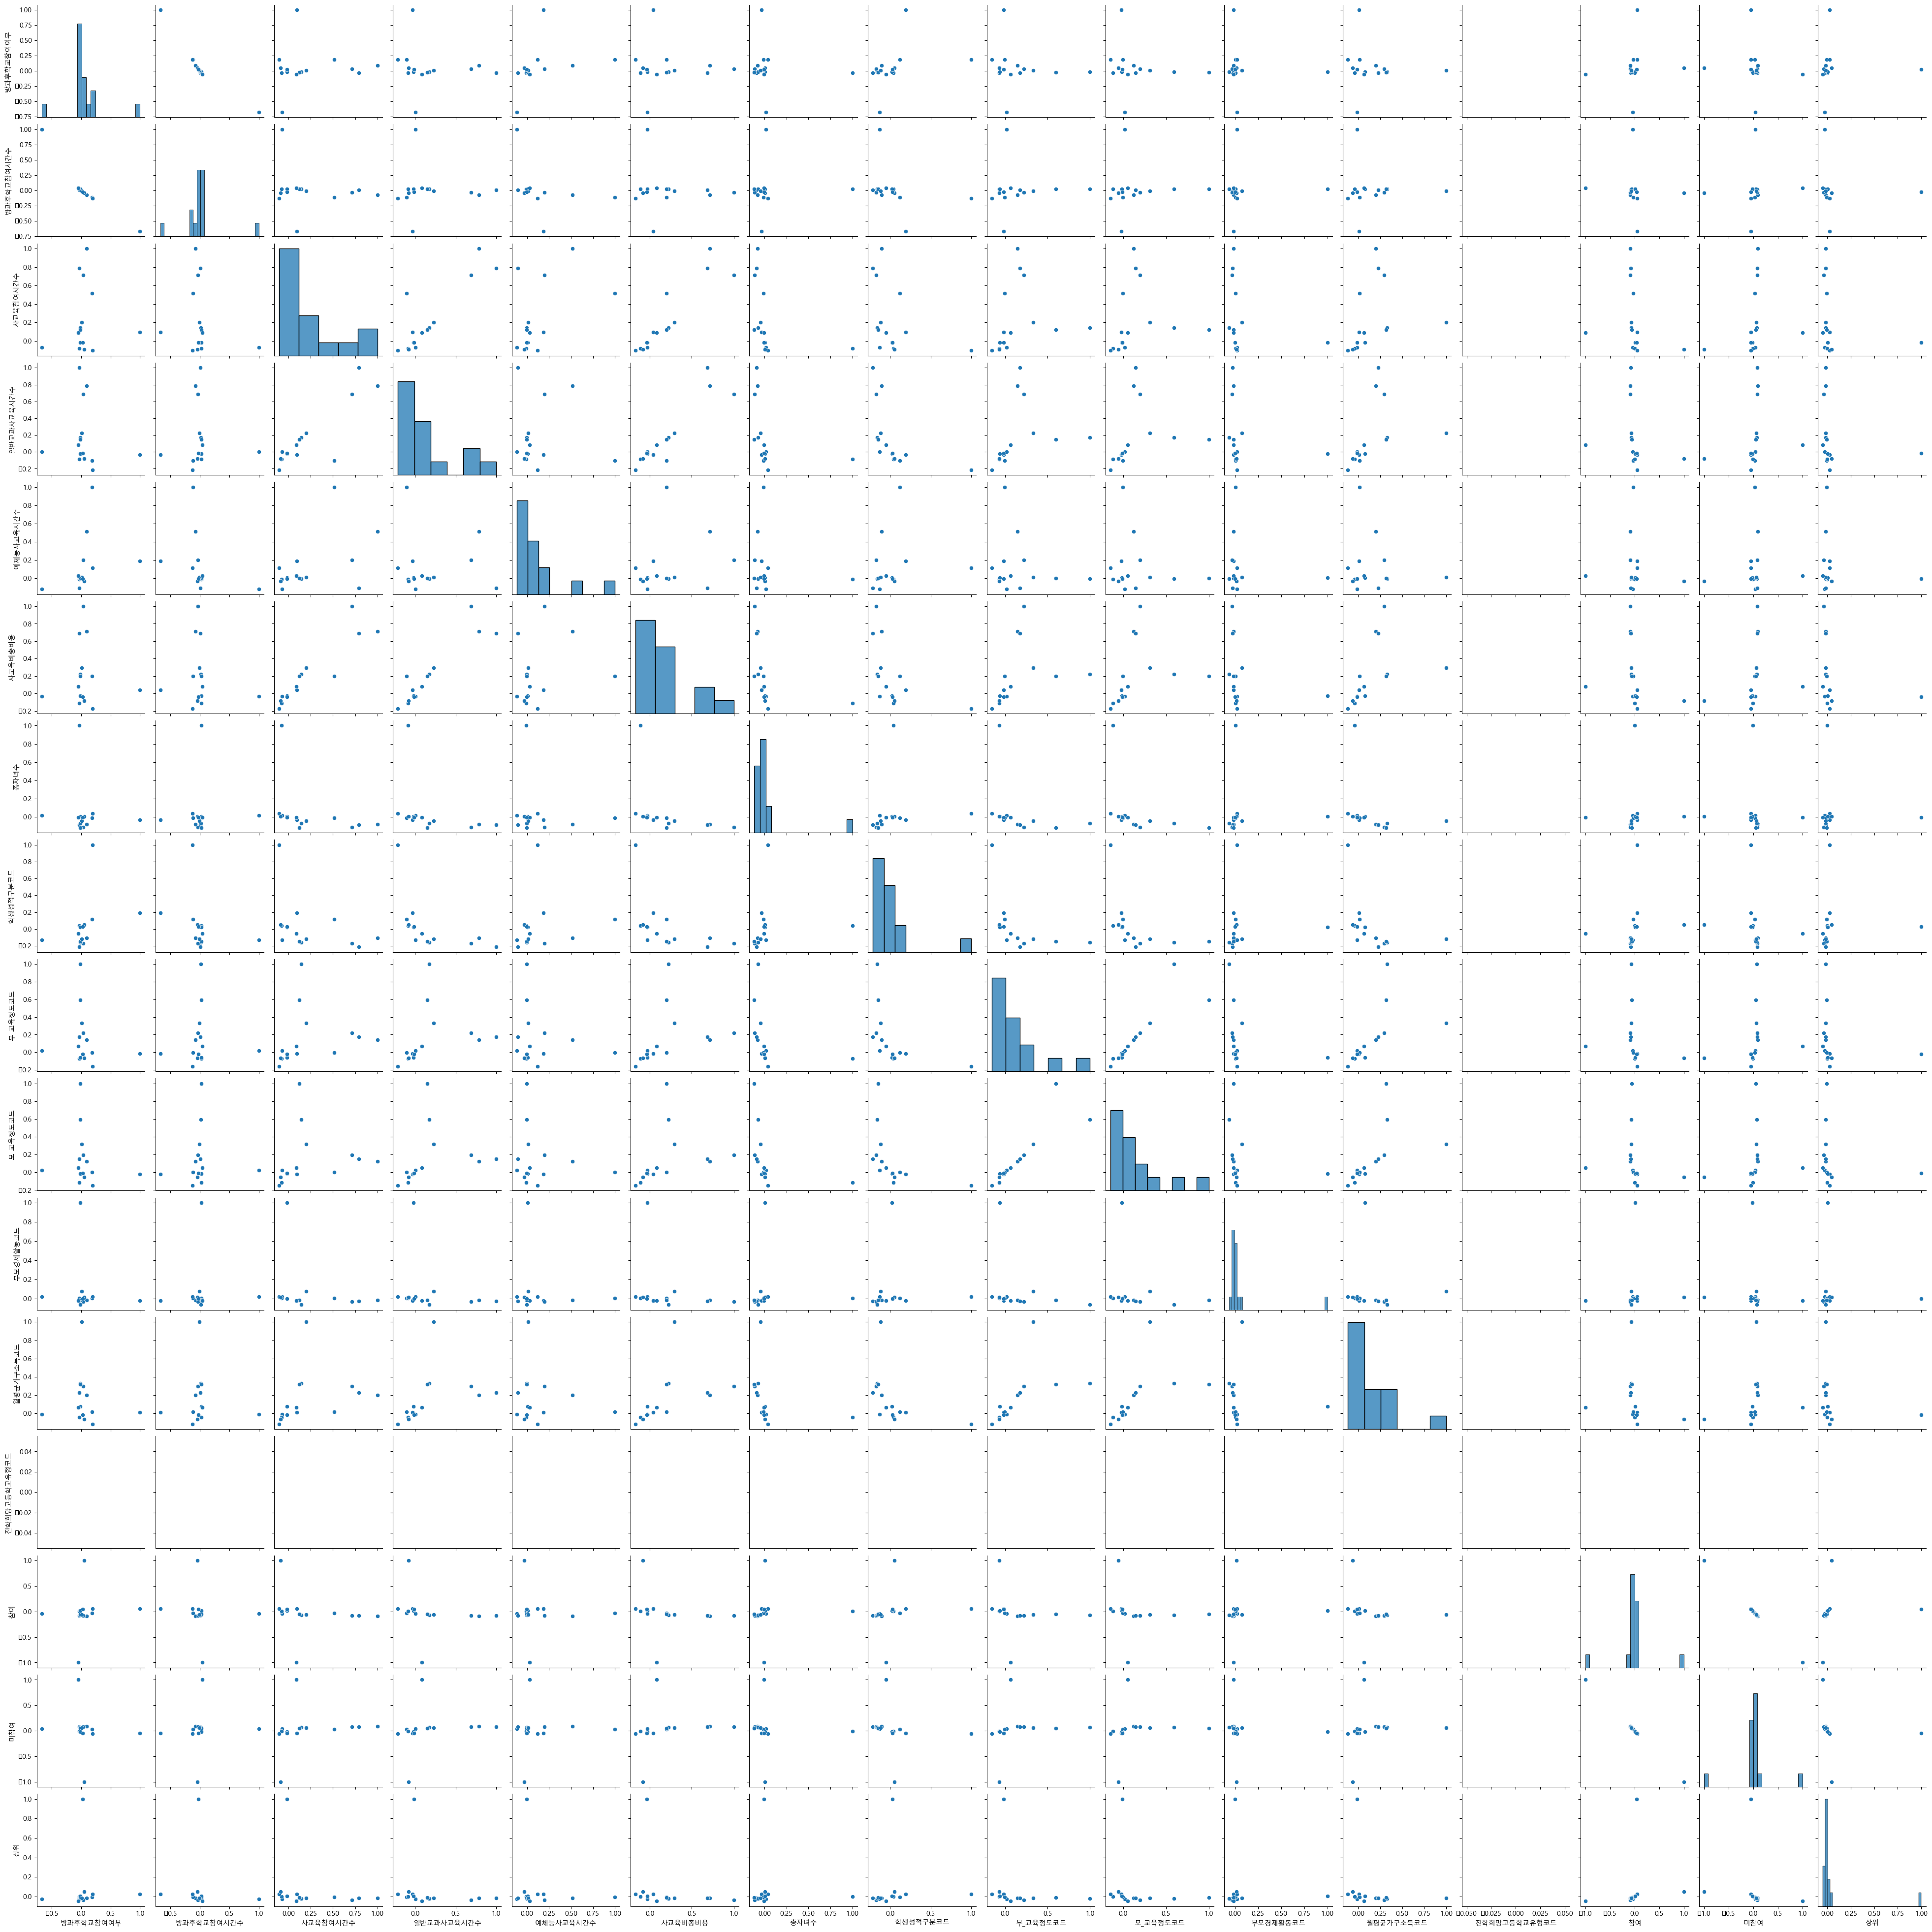

In [120]:
sns.pairplot(df8_corr)
plt.show()

In [158]:
group = df8.groupby('부모경제활동코드')['사교육비총비용'].mean()
group1 = pd.DataFrame(group)

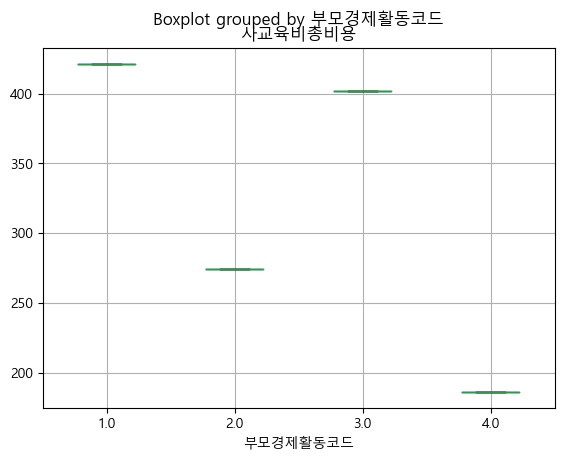

In [160]:
box2 = group1.boxplot(column='사교육비총비용', by='부모경제활동코드')
plt.show()